# Question2-Workshop 2 - Predicting loan cases using Decision Tree

By completing this notebook, you will be able to:
* Practice Python programming skills for data science.
* Apply data pre-processing and transformation methods.
    * Dealing with NULL values
    * Dealing with extreme values and outliers
    * Encoding
    * Normalisation
* Perform data analysis.
* Develop a data mining and informatics solution for predicting loan

In this notebook, you will be using <b>Pandas</b> to read the dataset and to perform data analysis. We will also be
using <b>matplotlib</b> for data visualisation. The notebook will further expand your understanding of data preprocessing,
by implementing some of the key pre-processing steps. We will be using <b>sklearn</b> for using data
mining and machine learning (ML) algorithms. The scikit-learn or sklearn is an open-source Machine Learning
library available in Python for building effective and efficient models. It is built on <b>NumPy, SciPy, and matplotlib.</b>
You will also be using NumPy library, which is for numeric calculations. NumPy is n-dimensional array, and it is
used for Numerical Python, including basic linear algebra functions, Fourier transforms, advanced random
number capabilities.

In this notebook, we will build a decision tree model to predict whether an applicant is eligible for the loan or not
based on the given applicant's information? To achieve this, we will first perform some data analysis and data
pre-processing, which includes <b>dealing with missing values and outliers values</b> that appear in the dataset.
We will then use sklearn to build <b>decision tree classifier.</b>

To run the notebook, restart the Kernel by selecting Restart & Clear Output. Then run each cell one at a time. If
it doesn't start, you may have to set the Kernel to Python 3. For this, click Kernel, select Change kernel and
select Python 3.

### Task:
Please complete the notebook, write appropriate code or description to answer questions provided
throughout the notebook and the Report section of the notebook. Please note that Try-it-yourself includes
marks. Save and deliver the completed notebook and a readable pdf format.

## Importing all the necessary libraries using import.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
pd.set_option('display.max_columns', 13)

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

For this task, you are required to generate your own version of dataset by randomly selected 550 rows. To
achieve this, replace 48 in random_state with the last two digits of your student number. i.e.'48' → 'last two
digits of your student number'. If the first number starts with '0', replace '0' with '2'. E.g., if the last two digits of
your student number is '05', use '25' instead. Failing to do so may result in '0' or reduced grades for this task.


In [6]:
dataset = dataset.sample(n=550, random_state = 60)

In [7]:
dataset.to_csv('IfeanyiIkewete_0617360.csv')

After randomising the dataset, we simply save it in a csv file using the code below. Name the file as
'YourName_YourStudentNumber.csv'. You are required to submit your dataset (IfeanyiIkewete_0617360.csv') with
the notebook. Pandas will add an additional column called 'Unnamed: 0'. This is the index of the original dataset.
As we have our own version of the dataset to work on, we drop 'Unnamed: 0' column using drop command.

In [8]:
data = pd.read_csv('IfeanyiIkewete_0617360.csv')

In [9]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,...,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,404,LP002301,Female,No,0,Graduate,...,0.0,194.0,360.0,1.0,Rural,N
1,519,LP002684,Female,No,0,Not Graduate,...,0.0,95.0,360.0,1.0,Rural,N
2,137,LP001491,Male,Yes,2,Graduate,...,3500.0,88.0,360.0,1.0,Urban,Y
3,262,LP001870,Female,No,1,Graduate,...,0.0,155.0,36.0,1.0,Semiurban,N
4,450,LP002446,Male,Yes,2,Not Graduate,...,1255.0,125.0,360.0,0.0,Rural,N


In [10]:
data=data.drop('Unnamed: 0', axis = 1)

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
3,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N


### Q1. Use and explain the following DataFrame functions/properties on your data.
* describe()
* size
* ndim
* shape

Hint: use print() to see what are the outputs.

In [12]:
# Describe()
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,530.000000,537.000000,508.000000
mean,5440.434545,1681.963491,146.749057,342.145251,0.834646
std,6349.150798,3021.312557,86.319116,65.189401,0.371866
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.250000,0.000000,100.000000,360.000000,1.000000
50%,3750.000000,1273.500000,127.000000,360.000000,1.000000
75%,5762.000000,2339.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### <code>describe()</code>

The <code>describe()</code> method in pandas is used to generate descriptive statistics for a DataFrame or Series object. It computes various summary statistics, such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column in the dataset.

The <code>describe()</code> method returns a DataFrame that contains the following statistics:

* count: the number of non-null values in each column
* mean: the average value of each column
* std: the standard deviation of each column
* min: the minimum value of each column
* 25%: the 25th percentile value of each column
* 50%: the 50th percentile (median) value of each column
* 75%: the 75th percentile value of each column
* max: the maximum value of each column

By default, the <code>describe()</code> method only computes statistics for numeric columns. However, we can use the include and exclude parameters to include or exclude specific data types, such as object or datetime columns.

In our case it's printed out the statistical summary of our numeric data.

### <code>size</code>

In [13]:
print(data.size)

7150


In pandas, the <code>size</code> property is used to return the total number of elements in a DataFrame or Series object. The size property differs from the shape property, which returns a tuple containing the number of rows and columns in the DataFrame or Series.

For a DataFrame, the <code>size</code> property returns the total number of elements in the DataFrame, which is equal to the product of the number of rows and columns. For example, if a DataFrame has 10 rows and 5 columns, the size property will return 50.

For a Series, the <code>size</code> property returns the total number of elements in the Series, which is equal to the number of rows.

### <code>ndim</code>

In [14]:
print(data.ndim)

2


In pandas, the <code>ndim</code> property is used to return the number of dimensions (axes) of a DataFrame or Series object.

For a DataFrame, the <code>ndim</code> property returns 2, since a DataFrame has a two-dimensional structure with rows and columns.

For a Series, the <code>ndim</code> property returns 1, since a Series has a one-dimensional structure with rows only.

In our case it's a dataframe so it's showing 2 in output because tables are 2 dimensional.

### <code>shape</code>

In [15]:
print(data.shape)

(550, 13)


n pandas, the <code>shape</code> property is used to return the dimensions (shape) of a DataFrame or Series object.

For a DataFrame, the <code>shape</code> property returns a tuple containing the number of rows and columns. The first element of the tuple is the number of rows, and the second element is the number of columns. For example, if a DataFrame has 10 rows and 5 columns, the shape property will return the tuple (10, 5).

For a Series, the <code>shape</code> property returns a tuple containing only the number of rows. The tuple has only one element, which is the number of rows in the Series.

In our case it's depicting that we have 550 rows and 13 columns. 

### Q2. Is there any difference between dimensions of the original dataset and the new dataset? If yes, what is the difference?

No there isn't any difference in the dimension because we still having data in the forms of rows and columns. It's a dataframe.

And the tabular data (rows and columns) is always 2 dimensional. 

### Q3. What are the possible values 'Education' can take? Write code to display all the possible values of 'Education'.

In [16]:
print(data['Education'].nunique())

2


In [17]:
print(data['Education'].unique())

['Graduate' 'Not Graduate']


In [18]:
data['Education'].value_counts()

Graduate        433
Not Graduate    117
Name: Education, dtype: int64

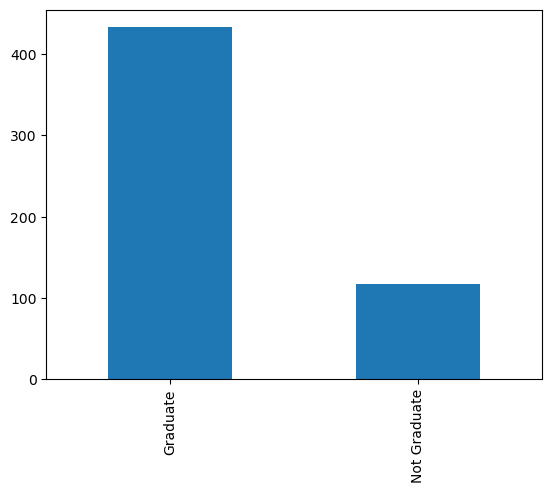

In [19]:
data['Education'].value_counts().plot(kind = 'bar')
plt.show()

It can takes only two possible values Graduate and Not Graduate. 

## Data Analysis

In [20]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The above cell, gets and displays coulmn names.

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
3,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N


For judging loan approval case, 'ApplicantIncome' and 'LoanAmount' look like important attributes. Let's look at these attributes. You will note that these are numeric variables.

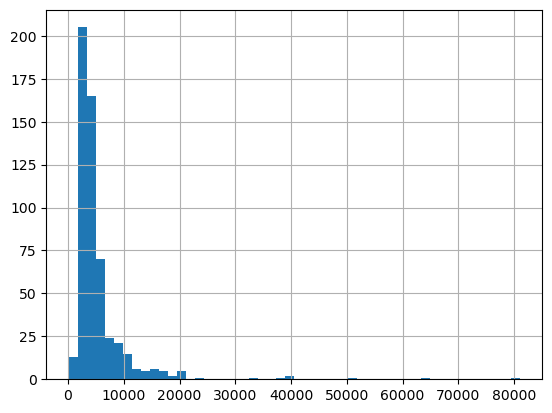

In [22]:
data['ApplicantIncome'].hist(bins=50)
plt.show()

#### Q4. Use boxplot and histogram on 'ApplicantIncome' to visualise its distribution.

Histogram and boxplot are used on the same feature to visualise the data distribution. Compare both the plots and report:

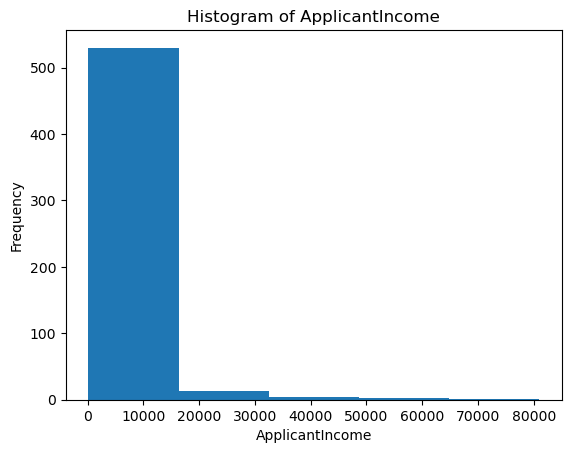

In [23]:
plt.hist(data['ApplicantIncome'], bins=5)
plt.title("Histogram of ApplicantIncome")
plt.xlabel("ApplicantIncome")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of the data by dividing the range of values into five equally sized bins and counting the number of observations that fall into each bin. We can see that the data is roughly symmetric around a central value, with a slight tendency towards higher values. The frequency of observations in each bin ranges from 1 to 5.

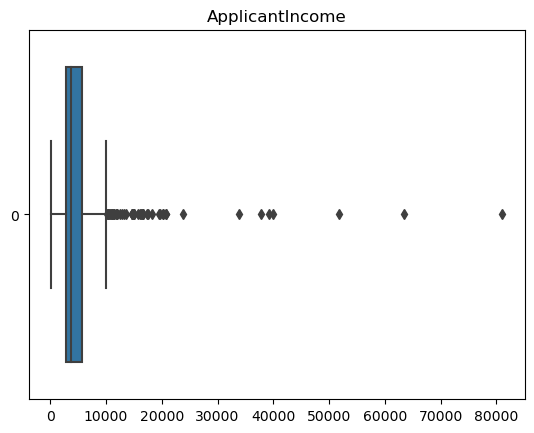

In [24]:
sns.boxplot(data = data['ApplicantIncome'], orient="h")
plt.title("ApplicantIncome")
plt.show()

The boxplot shows a graphical representation of the five-number summary of the data: the minimum value (150), the first quartile (2875.25), the median (3750), the third quartile (5762), and the maximum value (81000). The box itself shows the interquartile range (IQR), which is the distance between the first and third quartiles, and the whiskers extend to the minimum and maximum values that are within 1.5 times the IQR. The dots above the whiskers represent values that are outside of this range and are considered outliers. In this case, there is one outlier, which is the value 16.

Together, these plots give us a good understanding of the distribution of the data, including its central tendency, spread, and any potential outliers.


#### 4a. What are the extreme values? Are there any outliers(s) exist in this dataset? Explain with example based on the 'ApplicantIncome'?

* All the value above maximum limits of the box plots are extreme values. 
* If we Look at the application Income example we can see there are outliers after the maximum limits. 
* outliers can be identified using various statistical methods such as z-score, interquartile range (IQR), and Tukey's method. Once identified, outliers can be handled in different ways such as removing them from the dataset, replacing them with a more representative value, or keeping them in the dataset but analyzing them separately.
* let's calculate the values.

In [25]:
# Calculate the first and third quartiles
q1, q3 = np.percentile(data['ApplicantIncome'], [25, 75])

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the maximum limits for outliers
maximum_limit = q3 + (1.5 * iqr)

print("Maximum limit for outliers:", maximum_limit)

Maximum limit for outliers: 10092.125


* All those values which are above 10092.125 are outliers in the Applicant Income feature. 

In [26]:
#let's see those values
data.loc[data['ApplicantIncome']>10092.125, ['ApplicantIncome']]

,ApplicantIncome
10,12000
11,11500
17,13262
30,23803
47,16120
60,15000
66,19730
86,11250
89,10833
106,16667


All the above values are outliers. 

In ApplicantIncome:
* In the boxplot graph the black dots after maximum range are outliers. We can see we have a lot of outliers in our feature.
* The skewness of the histogram is depicting that we have outliers in our data. 

#### 4b. Are the results of both the plots comparable? Are there any differences in the two plots? What are the key differences?

Histogram and box plot are two commonly used methods for visualizing the distribution of a dataset in Python.

* Histograms are plots that show the distribution of continuous data. They divide the range of data into intervals or bins and count the number of observations that fall into each bin. The resulting plot shows the frequency or count of observations in each bin, creating a picture of the overall distribution of the data. Histograms are typically represented as bar charts, with the x-axis representing the range of values and the y-axis representing the count or frequency of observations.

* Box plots, also known as box-and-whisker plots, provide a visual representation of the distribution of data through their quartiles. They summarize the distribution of a dataset by showing the median, the interquartile range (IQR), and any outliers. The box itself represents the IQR, with the median as a line in the box. The "whiskers" extend to the smallest and largest data points within a certain distance of the IQR. Box plots are useful for comparing distributions between different groups or datasets.

In Summary: histograms show the frequency or count of observations in different bins, while box plots summarize the distribution of a dataset through its quartiles, median, and outliers. 

Both are useful tools for visualizing the distribution of data, and the choice between them depends on the specific goals of the analysis.

**Try-It-Yourself:** Use Histogram and Box plot on 'LoanAmount' and observe extreme values.

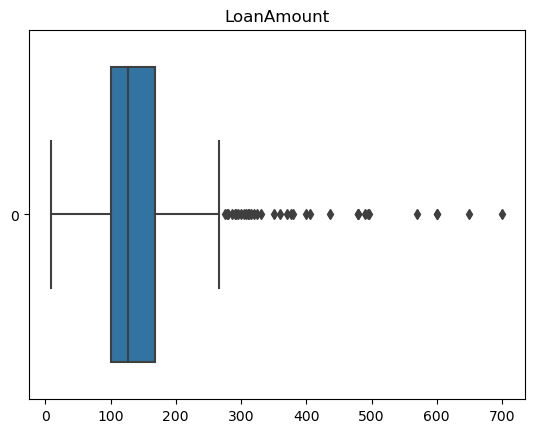

In [27]:
#BoXplot
sns.boxplot(data = data['LoanAmount'], orient="h")
plt.title("LoanAmount")
plt.show()

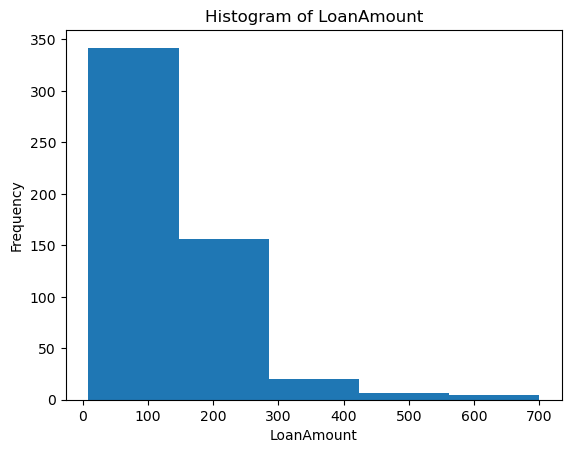

In [28]:
#Histogram
plt.hist(data['LoanAmount'], bins=5)
plt.title("Histogram of LoanAmount")
plt.xlabel("LoanAmount")
plt.ylabel("Frequency")
plt.show()

In the boxplot graph the black dots after maximum range are outliers. We can see we have a lot of outliers in LoanAmount.

The skewness of the histogram is depicting that we have outliers in our data.

### Categorical variable analysis

In this section we will create a pivot table from dataframe, which is similar to the pivot table in excel. A Pivot
Table is an effective way of analysing and summarising data using aggregate functions such as sum, mean and
count. You can then compare, see patterns and trends in the data.

If you are not sure what is pivote table. Please see pivote table (https://en.wikipedia.org/wiki/Pivot_table) and
simple working example (http://www.datasciencemadesimple.com/create-pivot-table-pandas-python/) of pivote
table.

In [29]:
data['Credit_History'].value_counts()

1.0    424
0.0     84
Name: Credit_History, dtype: int64

In [30]:
credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting')

Frequency Table for Credit History:
0.0     84
1.0    424
Name: Credit_History, dtype: int64

Probability of getting


In [31]:
data['Loan_Status'].value_counts()

Y    378
N    172
Name: Loan_Status, dtype: int64

In [32]:
data.shape

(550, 13)

We have created pivote table loan_probability by taking mean of Loan_status. We used print() to print the table.
Next, create bar graphs to visualise both.

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
3,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N


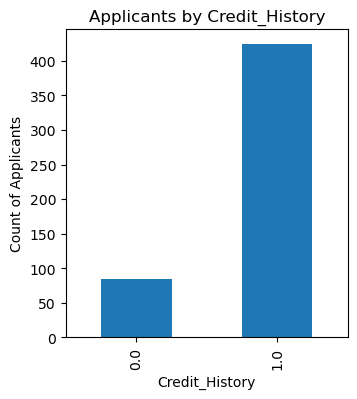

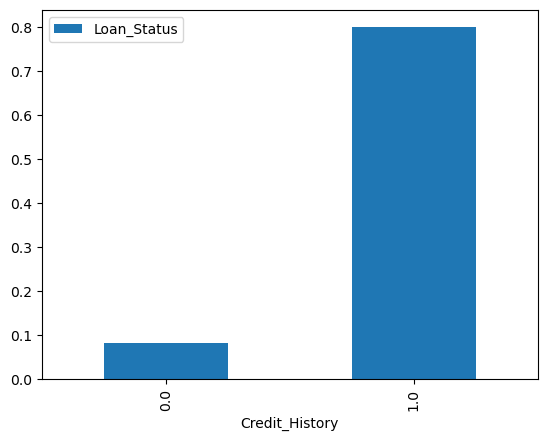

In [34]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

### Data Pre-processing

* Missing values
* Outliers and extreme values
* Dealing with non-numerical fields

In [35]:
data['Gender'].value_counts()

Male      442
Female     96
Name: Gender, dtype: int64

#### Filling in missing values by mean
As you can see there are several missing values exist in the dataset. For instance, Gender has 13 missing
values and LoanAmount has 22 missing values. We need to deal with the missing values. There are various
ways to deal with it. Here, we will use mean of LoanAmount to replace all it's missing values.

In [36]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
3,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N


In [38]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,194.0,360.0,1.0,Rural,N
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
3,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N


In [40]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
data.shape

(550, 13)

In [42]:
data.to_csv('new_train.csv')

It will be interesting to know how much loan amount could be offered to which sort of people based on their 'Education' and 'Self Employed' statues?

For this, we'll use boxplot and group by multiple variables - 'Education' and 'Self_Employed'.

Note: LoanAmount is a numeric attribute. Whereas, Group by can be applied on numeric and non-numeric attributes.

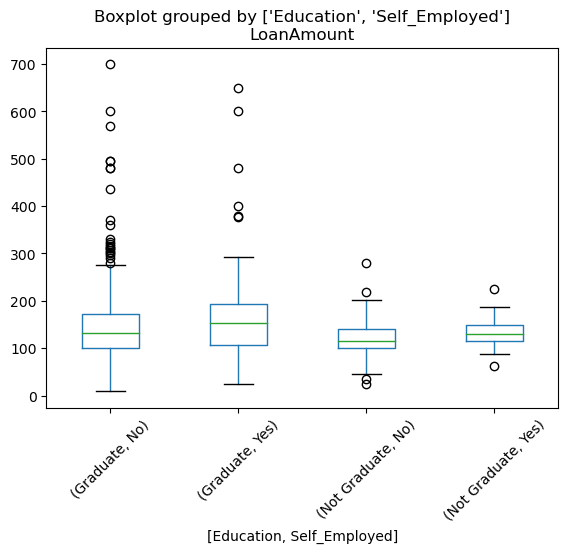

In [43]:
data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
grid=False, rot = 45, fontsize = 10)
plt.show()

#### Impute the values

The above boxplot gives some good insight of each group receiving the loan amount. Data points that form a different patterns are outliers - in circles. We'll deal with the outliers later, for now let’s observe some of the variations which are visible in the median of loan amount. And, we have seen that Self_Employed has 32 missing values. This could be a possible reason of these variations.

So let's deal with this by imputing the values.

Before that let's fill in the missing values by some suitable values - not mean this time!

In [44]:
data['Self_Employed'].value_counts()

No     446
Yes     75
Name: Self_Employed, dtype: int64

From the frequence table of Self_Employed, we can see that around 86% values are “No”. Therefore, it is safe to impute the missing values as “No” as there is a high probability of success.

In [45]:
data['Self_Employed'].fillna('No', inplace=True)

In [46]:
data['Self_Employed'].value_counts()

No     475
Yes     75
Name: Self_Employed, dtype: int64

In [47]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

### Dealing with outliers

Extreme values are the minimum and the maximum values in the dataset. Values beyond extreme values are
considered as outliers.

Outliers are the data points those are far away from all other data point and represent unusual patterns in the
dataset.

Depending on the problem domain, outliers could be considered as an activity of interest (e.g., a malicious
attack in a network) or could be ignored completely (e.g., times of the day when the network traffic are high).

Most of the learning algorithms are sensitive to outliers. Outliers can negatively influence and distort the result.
Therefore, it is important to treat them. Outliers can be treated similar to missing values i.e., by removing or
replacing them by appropriate values. It is also possible to take log transformation of outliers to reduce its
influence. In the following steps, we will see how to nullify outliers' impact by taking log transformation.

To better understand this concept, let's visualise ‘LoanAmount’ before and after treating outliers of
‘LoanAmount’.

In [48]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,537.000000,508.000000
mean,5440.434545,1681.963491,146.749057,342.145251,0.834646
std,6349.150798,3021.312557,84.732233,65.189401,0.371866
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.250000,0.000000,102.000000,360.000000,1.000000
50%,3750.000000,1273.500000,128.000000,360.000000,1.000000
75%,5762.000000,2339.000000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


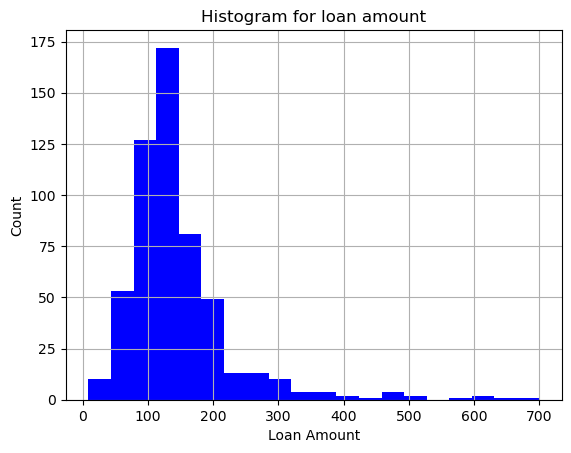

In [49]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

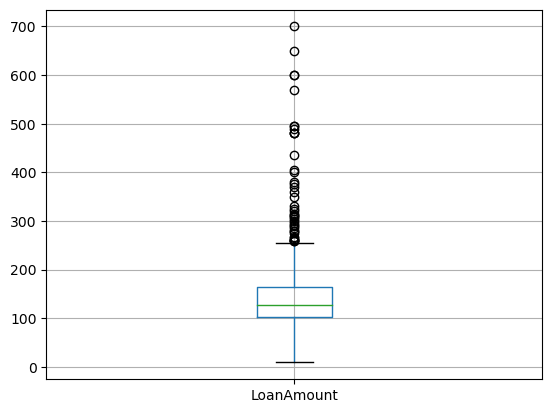

In [50]:
data.boxplot(column='LoanAmount')
plt.show()

In [51]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log'].hist(bins = 20)

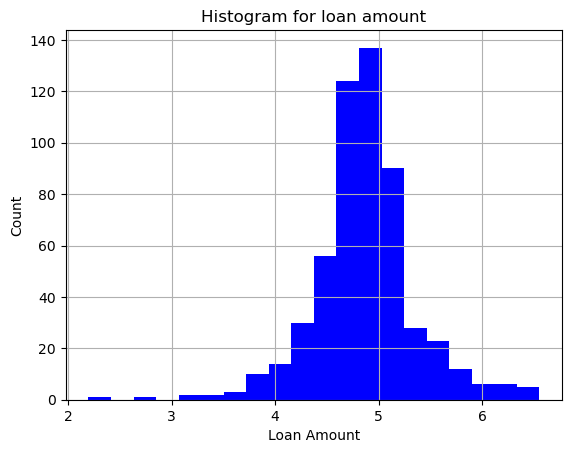

In [52]:
plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

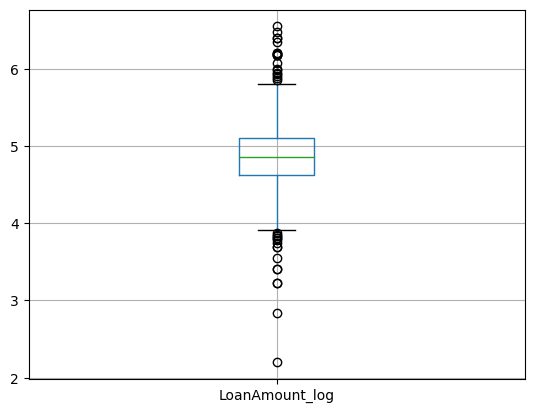

In [53]:
data.boxplot(column='LoanAmount_log')

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,...,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002301,Female,No,0,Graduate,Yes,...,194.0,360.0,1.0,Rural,N,5.267858
1,LP002684,Female,No,0,Not Graduate,No,...,95.0,360.0,1.0,Rural,N,4.553877
2,LP001491,Male,Yes,2,Graduate,Yes,...,88.0,360.0,1.0,Urban,Y,4.477337
3,LP001870,Female,No,1,Graduate,No,...,155.0,36.0,1.0,Semiurban,N,5.043425
4,LP002446,Male,Yes,2,Not Graduate,No,...,125.0,360.0,0.0,Rural,N,4.828314


In [55]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,537.000000,508.000000,550.000000
mean,5440.434545,1681.963491,146.749057,342.145251,0.834646,4.865163
std,6349.150798,3021.312557,84.732233,65.189401,0.371866,0.493413
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2875.250000,0.000000,102.000000,360.000000,1.000000,4.624973
50%,3750.000000,1273.500000,128.000000,360.000000,1.000000,4.852030
75%,5762.000000,2339.000000,164.750000,360.000000,1.000000,5.104426
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


It is ideal to remove 'LoanAmount' from the dataset as we have transformed it. Command below uses drop() to
drop a column.

In [56]:
data = data.drop(['LoanAmount'], axis=1)

Now the distribution looks much closer to normal.


**Try-it-yourself:** Perform some other interesting analysis which can be derived from the data. Such as:
* Check another variable for outliers and treat it.
* Generate a new variable by combining two variables e.g., 'ApplicantIncome' and 'CoapplicantIncome

There are several ways to treat outliers in Python, depending on the nature of the data and the specific use case. Here are some common methods to treat outliers:

* Removing outliers: This method involves removing the outliers from the dataset. Depending on the nature of the data and the specific use case, we can remove the outliers based on a fixed threshold or using statistical methods such as z-score, interquartile range (IQR), or standard deviation.

* Replacing outliers: This method involves replacing the outliers with some other values such as the median, mean, or some other statistical value.

* Transformation: This method involves transforming the data to a different scale or distribution to reduce the effect of outliers. For example, we can apply log transformation or Box-Cox transformation to the data.

Let's use second method here. 

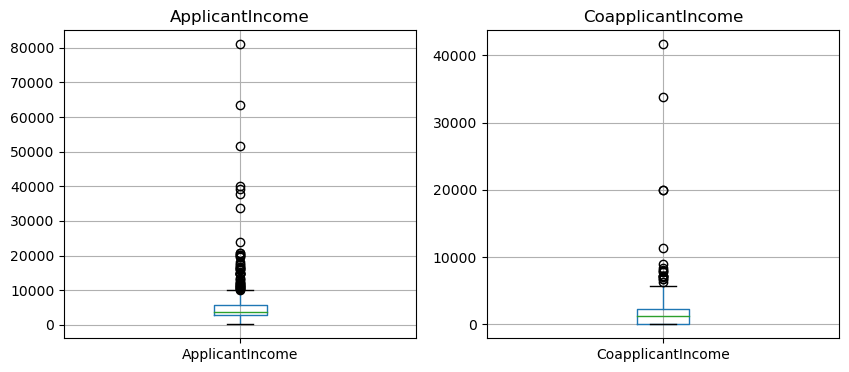

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the boxplots for each numeric column in the DataFrame
data.boxplot(column=['ApplicantIncome'], ax=ax[0])
data.boxplot(column=['CoapplicantIncome'], ax=ax[1])

# Set the title for each subplot
ax[0].set_title('ApplicantIncome')
ax[1].set_title('CoapplicantIncome')

# Show the plot
plt.show()


In [58]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002301,Female,No,0,Graduate,Yes,7441,0.0,360.0,1.0,Rural,N,5.267858
1,LP002684,Female,No,0,Not Graduate,No,3400,0.0,360.0,1.0,Rural,N,4.553877
2,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,360.0,1.0,Urban,Y,4.477337
3,LP001870,Female,No,1,Graduate,No,3481,0.0,36.0,1.0,Semiurban,N,5.043425
4,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,360.0,0.0,Rural,N,4.828314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,360.0,1.0,Urban,Y,5.075174
546,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,360.0,1.0,Rural,N,4.189655
547,LP001846,Female,No,3+,Graduate,No,3083,0.0,360.0,1.0,Rural,Y,5.541264
548,LP001877,Male,Yes,2,Graduate,No,4708,1387.0,360.0,1.0,Semiurban,Y,5.010635


In [59]:
# ApplicantIncome
median = data['ApplicantIncome'].median()
std = data['ApplicantIncome'].std()
data['ApplicantIncome'] = np.where((data['ApplicantIncome'] > median + 2 * std) | (data['ApplicantIncome'] < median - 2 * std), median, data['ApplicantIncome'])


In [60]:
# ApplicantIncome
median = data['CoapplicantIncome'].median()
std = data['CoapplicantIncome'].std()
data['CoapplicantIncome'] = np.where((data['CoapplicantIncome'] > median + 2 * std) | (data['ApplicantIncome'] < median - 2 * std), median, data['CoapplicantIncome'])


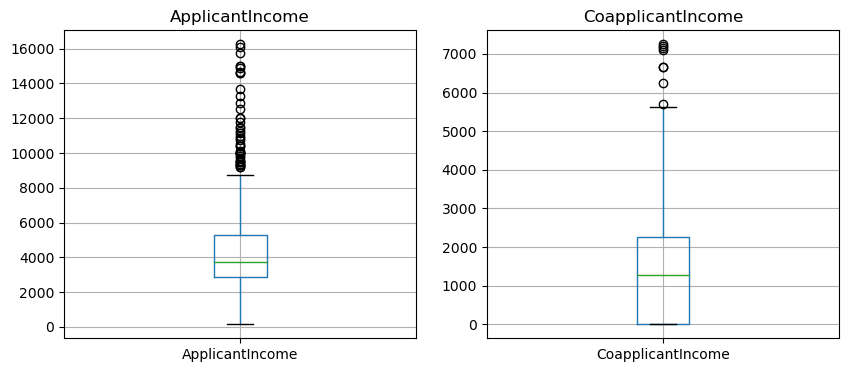

In [61]:
# now let's test outliers
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the boxplots for each numeric column in the DataFrame
data.boxplot(column=['ApplicantIncome'], ax=ax[0])
data.boxplot(column=['CoapplicantIncome'], ax=ax[1])

# Set the title for each subplot
ax[0].set_title('ApplicantIncome')
ax[1].set_title('CoapplicantIncome')

# Show the plot
plt.show()


* It's much better than before. 

We can generate a new variable by combining two variables using different methods depending on the nature of the variables. Here are some methods to combine variables:
* Addition/Subtraction: We can combine two variables by adding or subtracting them. This method is useful when we have two variables that represent some quantities that can be added or subtracted.
* Multiplication/Division: We can combine two variables by multiplying or dividing them. This method is useful when we have two variables that represent some quantities that can be multiplied or divided.

In our case first one is appropriate according to data. 

In [62]:
data['ApplicantIncome'] + data['CoapplicantIncome']

0      7441.0
1      3400.0
2      6816.0
3      3481.0
4      3564.0
        ...  
545    4570.0
546    3453.0
547    3083.0
548    6095.0
549    8300.0
Length: 550, dtype: float64

#### Missing values continuous

There are more missing values present in the data. Before we build the model, we need to perform some more pre-processing and convert all the values as numeric:
* Fill all the missing values.
* Convert categorical variables into numeric as sklearn works on numeric values only.

Here we will use mode() to fill in the missing values. Mode is the value which occurs most often.

In [63]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
#0:gets the mode of each column, 1: for each row
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [64]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

#### Q5. Use LabelEncoder, to convert categorical variables into numeric. Hint: You will first need to identify categorial values.

In [65]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP002301,Female,No,0,Graduate,Yes,7441.0,0.0,360.0,1.0,Rural,N,5.267858
1,LP002684,Female,No,0,Not Graduate,No,3400.0,0.0,360.0,1.0,Rural,N,4.553877
2,LP001491,Male,Yes,2,Graduate,Yes,3316.0,3500.0,360.0,1.0,Urban,Y,4.477337
3,LP001870,Female,No,1,Graduate,No,3481.0,0.0,36.0,1.0,Semiurban,N,5.043425
4,LP002446,Male,Yes,2,Not Graduate,No,2309.0,1255.0,360.0,0.0,Rural,N,4.828314


In [66]:
data.shape

(550, 13)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
columns = list(data)
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log']


In [69]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

In [70]:
columns = list(data.select_dtypes(exclude=['float64','int64']))

Above cell will select the columns which are not integer.

In [71]:
le = LabelEncoder()
for i in columns:
    #print(i)
    data[i] = le.fit_transform(data[i])

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,357,0,0,0,0,1,7441.0,0.0,360.0,1.0,0,0,5.267858
1,463,0,0,0,1,0,3400.0,0.0,360.0,1.0,0,0,4.553877
2,114,1,1,2,0,1,3316.0,3500.0,360.0,1.0,2,1,4.477337
3,225,0,0,1,0,0,3481.0,0.0,36.0,1.0,1,0,5.043425
4,399,1,1,2,1,0,2309.0,1255.0,360.0,0.0,0,0,4.828314


### Data Normalisation

As can be seen in the above table each column is in different scales. For example 'ApplicantIncome' column is
in the range of thousands while 'Dependents' column is usually below 10. Having features with different scales
can cause problems to the machine learning model. Therefore, we perform normalisation across the columns
using normalize function in sklearn. There are other ways to scale the dataset within a range, which is know as
'Scaling' (or standardization). This can be performed using 'StandardScaler' method available in sklearn
package. We will see this in the following workshop (Week 5).

In [73]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [74]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,357,0,0,0,0,1,7441.0,0.0,360.0,1.0,0,0,5.267858
1,463,0,0,0,1,0,3400.0,0.0,360.0,1.0,0,0,4.553877
2,114,1,1,2,0,1,3316.0,3500.0,360.0,1.0,2,1,4.477337
3,225,0,0,1,0,0,3481.0,0.0,36.0,1.0,1,0,5.043425
4,399,1,1,2,1,0,2309.0,1255.0,360.0,0.0,0,0,4.828314


In [75]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,357,0,0,0,0,1,7441.0,0.0,360.0,1.0,0,0,5.267858
1,463,0,0,0,1,0,3400.0,0.0,360.0,1.0,0,0,4.553877
2,114,1,1,2,0,1,3316.0,3500.0,360.0,1.0,2,1,4.477337
3,225,0,0,1,0,0,3481.0,0.0,36.0,1.0,1,0,5.043425
4,399,1,1,2,1,0,2309.0,1255.0,360.0,0.0,0,0,4.828314


In [76]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,357,0,0,0,0,1,7441.0,0.0,360.0,1.0,0,0,5.267858
1,463,0,0,0,1,0,3400.0,0.0,360.0,1.0,0,0,4.553877
2,114,1,1,2,0,1,3316.0,3500.0,360.0,1.0,2,1,4.477337
3,225,0,0,1,0,0,3481.0,0.0,36.0,1.0,1,0,5.043425
4,399,1,1,2,1,0,2309.0,1255.0,360.0,0.0,0,0,4.828314


In [77]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In the above cell, we excluded two coulmns 'Loan_Status' and 'Loan_ID' from being normalised. 'Loan_Status'
is a target class and is a binary class. Therefore, normalisation is not needed on it. We also dropped 'Loan_ID'.
Could you think of a reason why 'Loan_ID' is dropped?

In [78]:
normalized_data = normalize( data_for_norm )

In [79]:
print(normalized_data[0:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.34233496e-04 9.98831442e-01 0.00000000e+00 4.83240585e-02
  1.34233496e-04 0.00000000e+00 7.07123016e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.92482410e-04
  0.00000000e+00 9.94440193e-01 0.00000000e+00 1.05293668e-01
  2.92482410e-04 0.00000000e+00 1.33192889e-03]
 [2.06832917e-04 2.06832917e-04 4.13665834e-04 0.00000000e+00
  2.06832917e-04 6.85857952e-01 7.23915209e-01 7.44598500e-02
  2.06832917e-04 4.13665834e-04 9.26060633e-04]
 [0.00000000e+00 0.00000000e+00 2.87258074e-04 0.00000000e+00
  0.00000000e+00 9.99945354e-01 0.00000000e+00 1.03412906e-02
  2.87258074e-04 2.87258074e-04 1.44876458e-03]
 [3.76992645e-04 3.76992645e-04 7.53985291e-04 3.76992645e-04
  0.00000000e+00 8.70476018e-01 4.73125770e-01 1.35717352e-01
  0.00000000e+00 0.00000000e+00 1.82023877e-03]]


Resultant normalized data (normalized_data) is in the form of ndimenssional array. Therefore, we fit it back to a
dataframe to perform further processing with Pandas.

In [80]:
normalized_data.shape

(550, 11)

In [81]:
data.shape

(550, 13)

In [82]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [83]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,0.000000,0.000000,0.000000,0.000000,0.000134,0.998831,0.000000,0.048324,0.000134,0.000000,0.000707
1,0.000000,0.000000,0.000000,0.000292,0.000000,0.994440,0.000000,0.105294,0.000292,0.000000,0.001332
2,0.000207,0.000207,0.000414,0.000000,0.000207,0.685858,0.723915,0.074460,0.000207,0.000414,0.000926
3,0.000000,0.000000,0.000287,0.000000,0.000000,0.999945,0.000000,0.010341,0.000287,0.000287,0.001449
4,0.000377,0.000377,0.000754,0.000377,0.000000,0.870476,0.473126,0.135717,0.000000,0.000000,0.001820


In [84]:
normalized_data['Loan_ID'] = data['Loan_ID']

The above code inserts column 'Loan_ID' based on the 'index' in the dataframe.

In [85]:
normalized_data['Loan_Status'] = data['Loan_Status']

The above code inserts column 'Loan_Status' based on the 'index' in the dataframe.

In [86]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.000134,0.998831,0.000000,0.048324,0.000134,0.000000,0.000707,357,0
1,0.000000,0.000000,0.000000,0.000292,0.000000,0.994440,0.000000,0.105294,0.000292,0.000000,0.001332,463,0
2,0.000207,0.000207,0.000414,0.000000,0.000207,0.685858,0.723915,0.074460,0.000207,0.000414,0.000926,114,1
3,0.000000,0.000000,0.000287,0.000000,0.000000,0.999945,0.000000,0.010341,0.000287,0.000287,0.001449,225,0
4,0.000377,0.000377,0.000754,0.000377,0.000000,0.870476,0.473126,0.135717,0.000000,0.000000,0.001820,399,0


Now, we can see that the dataset is suitable to be fed to a machine learning algorithm. For example, it is in
numeric format and normalised to a fixed range. More analysis and computation could be performed on the
dataset as required, and also, it is in a format which can be acceptable for machine learning models.

In [87]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000192,0.000151,0.000175,0.000057,0.000027,0.879652,0.310082,0.082196,0.000202,0.000254,0.001141,274.500000,0.687273
std,0.000122,0.000133,0.000274,0.000118,0.000077,0.158806,0.311372,0.036825,0.000124,0.000245,0.000421,158.915596,0.464026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.071268,0.000000,0.002207,0.000000,0.000000,0.000254,0.000000,0.000000
25%,0.000110,0.000000,0.000000,0.000000,0.000000,0.801280,0.000000,0.055609,0.000126,0.000000,0.000852,137.250000,0.000000
50%,0.000204,0.000161,0.000000,0.000000,0.000000,0.962560,0.262987,0.081615,0.000214,0.000227,0.001125,274.500000,1.000000
75%,0.000272,0.000257,0.000295,0.000000,0.000000,0.996461,0.590119,0.104745,0.000282,0.000377,0.001383,411.750000,1.000000
max,0.000673,0.000589,0.002219,0.000673,0.000482,0.999964,0.989945,0.242218,0.000740,0.001480,0.004333,549.000000,1.000000


## Building a Decision Tree classifier using sklearn

#### Importing all necessary libraries from sklearn

In [88]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay

#### Feature selection

For a small dataset, using all the features to build the feature space or a model may not be an exhaustive and
expensive process. However, for a large dataset, it is not an ideal way to utilise all the features as it will result in
a high dimensional feature space, and will be an exhaustive search, expensive and time-consuming job.

Feature selection is an important step of pre-processing, where we tend to remove the features that do not or
less likely to contribute to the classification results. We aim to remove such features without compromising on
the classification results.

There could be different ways to perform feature selection. One way is intuitive, where knowing the business
problem and domain knowledge, we simply use our judgement for selecting most discriminating features. There
are other automatic methods such as dimensionality reduction, statistical-based methods to identify feature
importance, etc.

In this notebook, first, we will be building a baseline model using all the features. Then we will be using feature
importance method available in sklearn to see the relative importance scores for each feature. You will then be
required to build a new module with the identified important features and compare the results of both the
models.

The process to build the model will be the same.

As you can see there are 13 features + 1 target in the final DataFrame. Remember, we have added a few new
features based on the existing ones such as 'LoanAmount_log'. To build the model we can select all or sub-set
of the features.

Let's perform some feature selection.

In [89]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'Loan_ID',
 'Loan_Status']

In [90]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.000134,0.998831,0.000000,0.048324,0.000134,0.000000,0.000707,357,0
1,0.000000,0.000000,0.000000,0.000292,0.000000,0.994440,0.000000,0.105294,0.000292,0.000000,0.001332,463,0
2,0.000207,0.000207,0.000414,0.000000,0.000207,0.685858,0.723915,0.074460,0.000207,0.000414,0.000926,114,1
3,0.000000,0.000000,0.000287,0.000000,0.000000,0.999945,0.000000,0.010341,0.000287,0.000287,0.001449,225,0
4,0.000377,0.000377,0.000754,0.000377,0.000000,0.870476,0.473126,0.135717,0.000000,0.000000,0.001820,399,0


In [91]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [92]:
print('Features:')
print(features.head())
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000000  0.000000    0.000000   0.000000       0.000134         0.998831   
1  0.000000  0.000000    0.000000   0.000292       0.000000         0.994440   
2  0.000207  0.000207    0.000414   0.000000       0.000207         0.685858   
3  0.000000  0.000000    0.000287   0.000000       0.000000         0.999945   
4  0.000377  0.000377    0.000754   0.000377       0.000000         0.870476   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.000000          0.048324        0.000134       0.000000   
1           0.000000          0.105294        0.000292       0.000000   
2           0.723915          0.074460        0.000207       0.000414   
3           0.000000          0.010341        0.000287       0.000287   
4           0.473126          0.135717        0.000000       0.000000   

   LoanAmount_log  
0        0.000707  
1        0.001332  
2        0

In [93]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,0.000000,0.000000,0.000000,0.000000,0.000134,0.998831,0.000000,0.048324,0.000134,0.000000,0.000707,357,0
1,0.000000,0.000000,0.000000,0.000292,0.000000,0.994440,0.000000,0.105294,0.000292,0.000000,0.001332,463,0
2,0.000207,0.000207,0.000414,0.000000,0.000207,0.685858,0.723915,0.074460,0.000207,0.000414,0.000926,114,1
3,0.000000,0.000000,0.000287,0.000000,0.000000,0.999945,0.000000,0.010341,0.000287,0.000287,0.001449,225,0
4,0.000377,0.000377,0.000754,0.000377,0.000000,0.870476,0.473126,0.135717,0.000000,0.000000,0.001820,399,0
5,0.000262,0.000262,0.000000,0.000000,0.000000,0.927868,0.360765,0.094386,0.000262,0.000000,0.001051,397,0
6,0.000178,0.000178,0.000000,0.000000,0.000000,0.182831,0.981045,0.064214,0.000178,0.000000,0.000959,474,1
7,0.000100,0.000100,0.000100,0.000000,0.000100,0.866342,0.498152,0.035989,0.000000,0.000000,0.000593,283,0
8,0.000231,0.000000,0.000000,0.000000,0.000000,0.734584,0.673407,0.083108,0.000231,0.000462,0.001173,519,1
9,0.000159,0.000159,0.000000,0.000000,0.000000,0.943248,0.327103,0.057331,0.000159,0.000000,0.000852,505,1


In [94]:
normalized_data.shape

(550, 13)

### Building our first baseline model using all the features.
### Partitioning data into Train and Test sets:
You will need to replace random_state = '48' with the 'last two digits of your student number'. If the first number
starts with '0', replace '0' with '2'. E.g., if the last two digits of your student number is '05', use '25' instead.**

In [95]:
normalized_data.shape

(550, 13)

In [96]:
from matplotlib import pyplot

In [97]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33,
random_state = 60)
print(x_train.shape, x_test.shape)

(368, 11) (182, 11)


In [98]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [99]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.02821
Feature: 1, Score: 0.06334
Feature: 2, Score: 0.04316
Feature: 3, Score: 0.04734
Feature: 4, Score: 0.01774
Feature: 5, Score: 0.13994
Feature: 6, Score: 0.01475
Feature: 7, Score: 0.11140
Feature: 8, Score: 0.30624
Feature: 9, Score: 0.07244
Feature: 10, Score: 0.15545


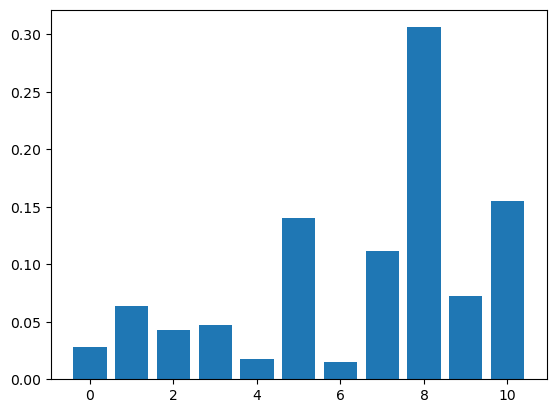

In [100]:
# feature importance
importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

features/columns: 

0:'Gender', 1:'Married', 2:'Dependents', 3:'Education', 4:'Self_Employed', 5:'ApplicantIncome',
6:'CoapplicantIncome', 7:'Loan_Amount_Term', 8:'Credit_History', 9:'Property_Area', 10:'LoanAmount_log'

In [101]:
prediction = dtc_model.predict(x_test)

In the above cell, 'prediction' stores the predicted results (targets/classes).

Since we converted the categorical values eariler using a label encoder, let's convert them back.

In [102]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

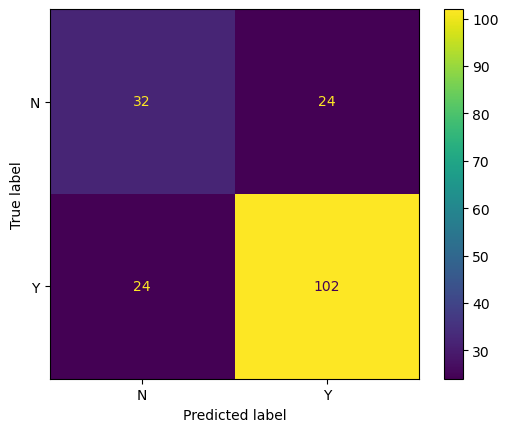

In [103]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.show()

In [104]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.57      0.57      0.57        56
           Y       0.81      0.81      0.81       126

    accuracy                           0.74       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.74      0.74      0.74       182



### Visualising the decision tree [Optional section]
We are visualising the decision tree in order to analyse it better. We are using Graphviz (https://graphviz.org/) to
do that.

First, download Graphviz from here (https://graphviz.org/download/). Select a version that is suitable for your
computer. After downloading, install it on your computer. In the installation process, you will come across a
screen similar to this.

Please remember the path to the destination folder as we need it later.

Second, we need to add Graphviz executables to the system path. Add "/bin/" to the destination folder path you
provided in the above step and execute the following command. Please note that this path can be different in
your system, and you need to provide the correct path.

In [105]:
from graphviz import Graph

In [106]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

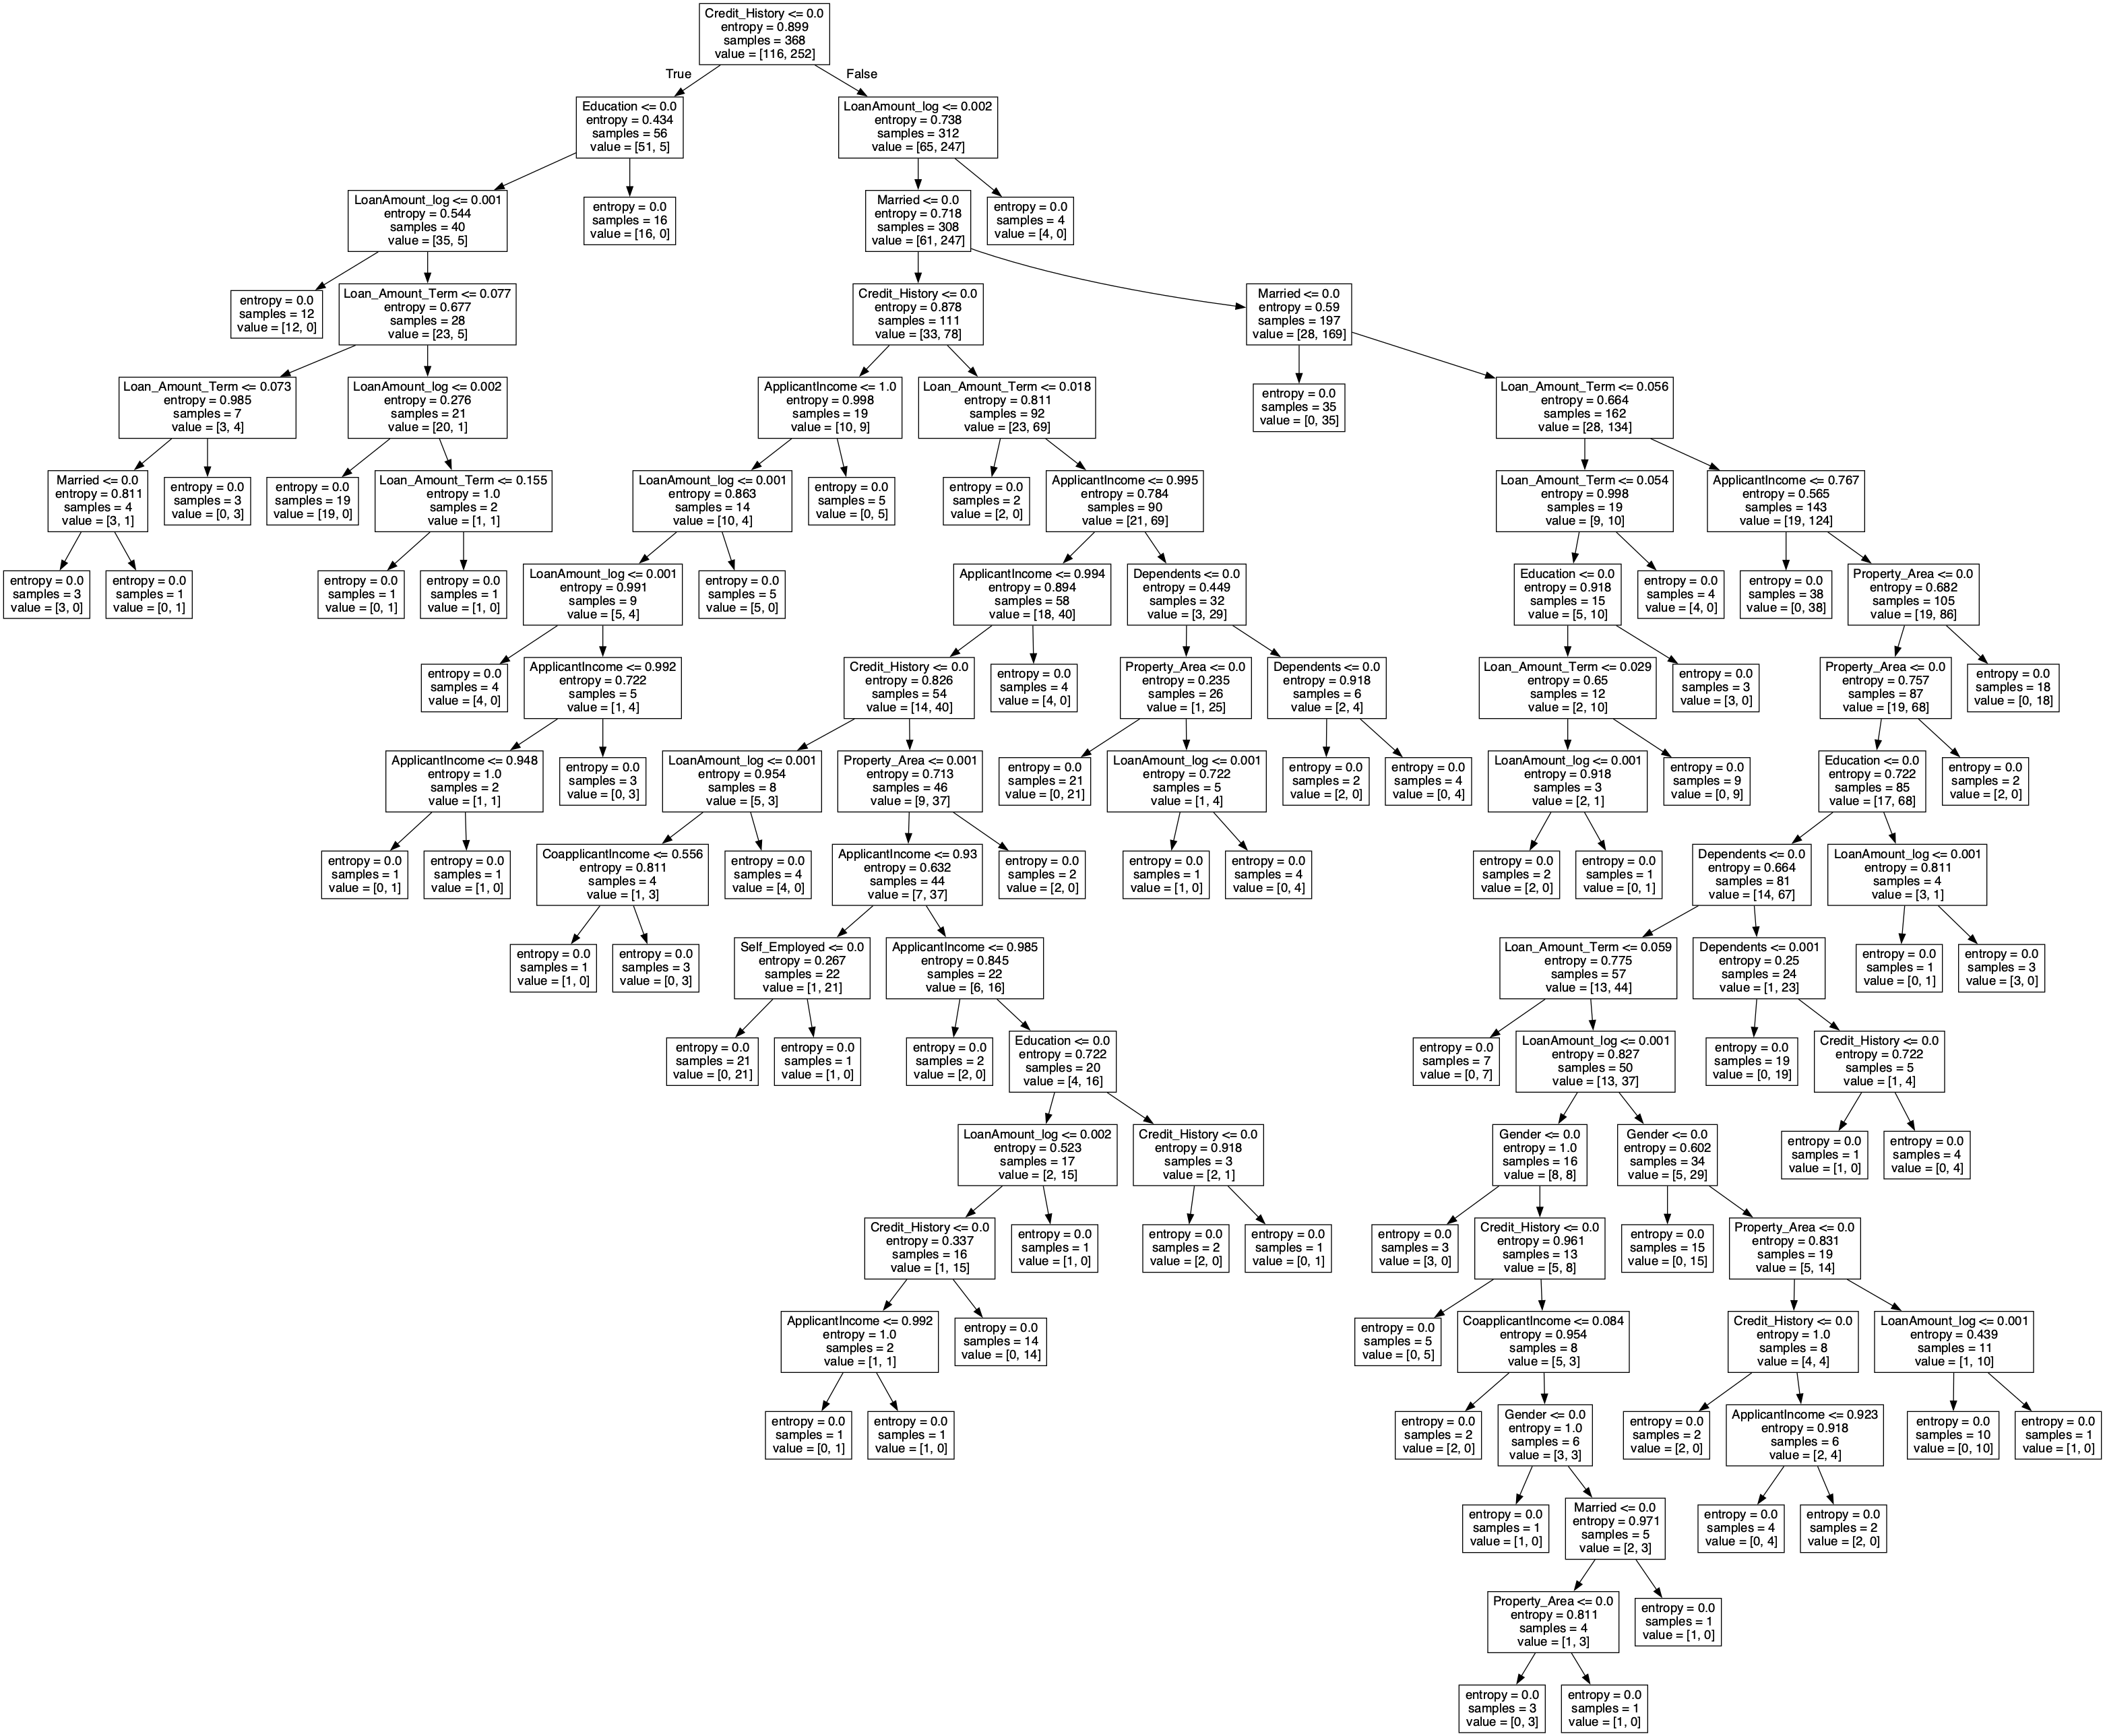

In [107]:
from cairosvg import svg2png
from IPython.display import Image
svg2png(bytestring=graph.pipe(format='svg'),write_to='output.png')
Image("output.png")

### Report
#### Answer the following questions. Please provide code as appropriate to answer the questions.

##### Q6. Based on the feature importance, select a different set of features to build another decision tree model. You should aim to improve the result of the baseline model.

* 'Loan_Amount_Term',
* 'Credit_History', 
* 'Property_Area', 
* 'LoanAmount_log', 
* 'ApplicantIncome',
                    
                    
                    
                    

The above features have more importance as compared to others based on the above scores.

In [108]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [109]:
imp_features = features[['Gender','Dependents','Loan_Amount_Term','Credit_History', 'Property_Area','LoanAmount_log','ApplicantIncome']]
x_train, x_test, y_train, y_test = train_test_split(imp_features, classes, test_size= .33,
random_state = 60)
print(x_train.shape, x_test.shape)

(368, 7) (182, 7)


In [110]:
dtc_model = decisionTree.fit(x_train, y_train)

In [111]:
prediction = dtc_model.predict(x_test)

In [112]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

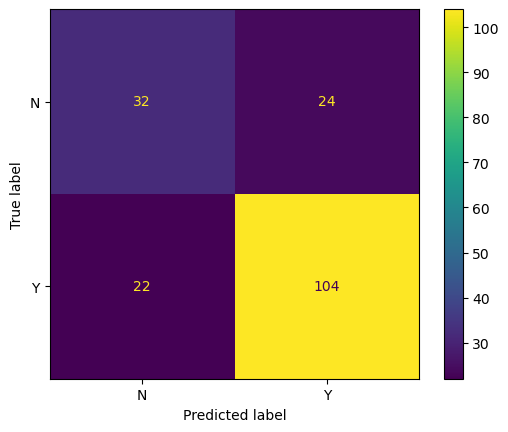

In [113]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.show()

In [114]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.59      0.57      0.58        56
           Y       0.81      0.83      0.82       126

    accuracy                           0.75       182
   macro avg       0.70      0.70      0.70       182
weighted avg       0.74      0.75      0.75       182



In [118]:
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=imp_features.columns))

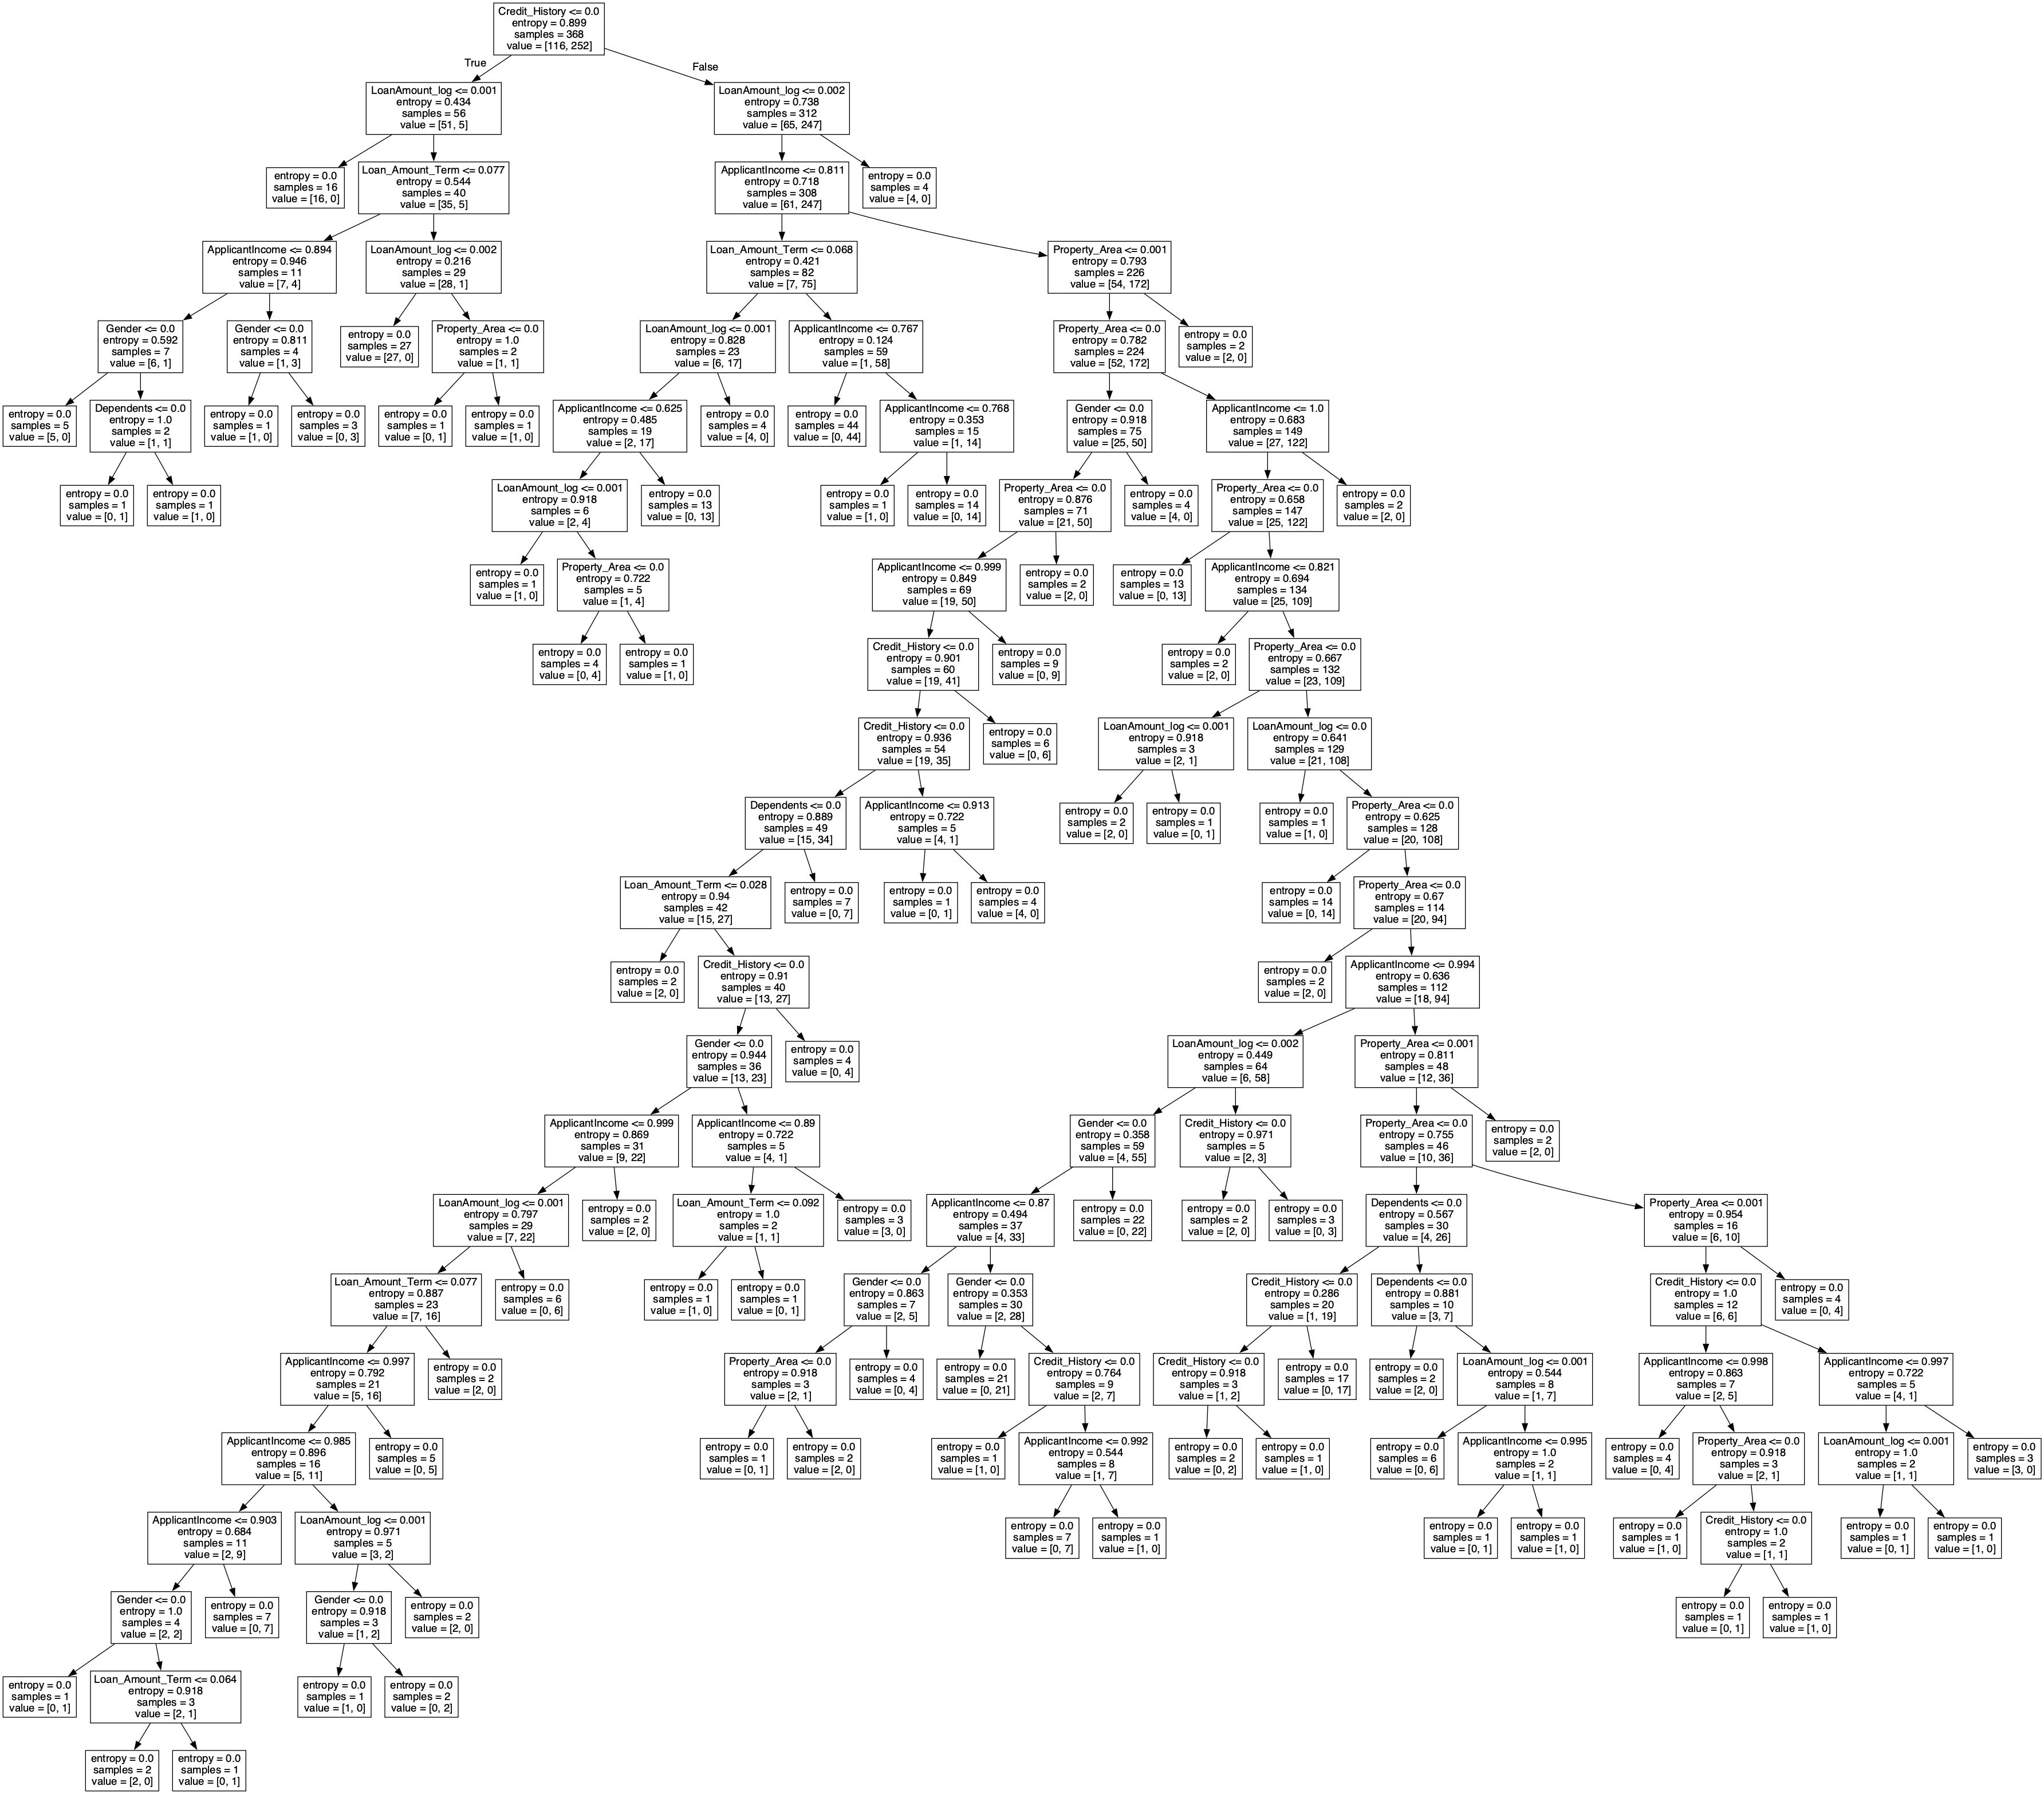

In [119]:
svg2png(bytestring=graph.pipe(format='svg'),write_to='output.png')
Image("output.png")

#### Q7. Write a summary (max 250 words) to compare both the models. The summary should include: idea behind selecting those particular features and comparative analysis of the results of both the models.

Decision trees are a popular machine learning algorithm that can be used for both classification and regression tasks. One of the main advantages of decision trees is their ability to automatically select the most important features in a dataset, which can lead to better predictive performance and a more interpretable model.

When building a decision tree model, the algorithm typically evaluates each feature in the dataset and selects the one that provides the most information gain for the next split. This process is repeated recursively until the tree is fully grown. In this way, decision trees automatically select the most informative features and use them to make predictions.

However, when working with very high-dimensional datasets or datasets with a large number of irrelevant features, the automatic feature selection process of decision trees may not be sufficient. In such cases, it may be necessary to manually select the most important features or use more advanced feature selection methods such as principal component analysis or correlation-based feature selection.

In summary, decision trees can automatically select the most important features in a dataset and use them to make predictions. However, in some cases, additional feature selection methods may be necessary to improve the accuracy and interpretability of the model, especially when dealing with high-dimensional or noisy datasets.

**Comparative Analysis:** 
* In our case we have selected 7 features out of 11. 
* And we did manual feature selections based on feature importance.
* We have selected those 7 features that have higher feature importance score as compared to the rest. 
* And we can see that there is an improvement in accuracy. 
* The old model was having 74% accuracy and newer model is having 75% accuracy. 

### Q8. Discuss the result based on the evaluation matrix (max 250 words).

**Performance Matrix:**
* Accuracy performance metrics can be decisive when dealing with imbalanced data.
* The confusion matrix, precision, recall, and F1 score gives better intuition of prediction results as compared to accuracy.
* in our case it's binary classification (0, 1).

<b><h3>Confusion matrix:</h3></b>
A confusion matrix is a way to evaluate the performance of a classification model in machine learning. It is a table that summarizes the predictions made by a classifier on a set of test data, comparing them to the true labels.

In Python's scikit-learn library, you can use the <code>confusion_matrix()</code> function to create a confusion matrix. This function takes two arguments: the true labels and the predicted labels.

It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

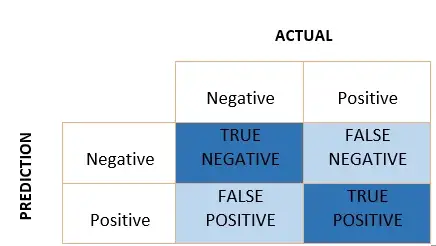

The confusing terms in the confusion matrix: true positive, true negative, false negative, and false positive. Let's understand it with our own results

* **True negatives (TN): 32.** This is the number of instances where the true label was negative (0), and the classifier correctly predicted it as negative.
* **False positives (FP): 20.** This is the number of instances where the true label was negative, but the classifier predicted it as positive (1).
* **False negatives (FN): 24.** This is the number of instances where the true label was positive (1), but the classifier predicted it as negative (0).
* **True positives (TP): 106.** This is the number of instances where the true label was positive, and the classifier correctly predicted it as positive.

The rows in the confusion matrix correspond to the true labels, while the columns correspond to the predicted labels. Each cell in the matrix represents the count of instances that belong to a particular combination of true and predicted labels.

The confusion matrix can be used to calculate various evaluation metrics such as precision, recall, F1-score, and accuracy, which can help in assessing the performance of a classification model.

**Precision**:
Out of all the positive predicted, what percentage is truly positive.

The precision value lies between 0 and 1.
In our case overall precision is 0.84

**Recall:**
Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).

In our case the recall is 0.81

When comparing different models, it will be difficult to decide which is better (high precision and low recall or vice-versa). Therefore, there should be a metric that combines both of these. One such metric is the **F1 score.**

**F1 Score**
It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account.
F1 score gives the same weightage to recall and precision.

Confusion matrix, precision, recall, and F1 score provides better insights into the prediction as compared to accuracy performance metrics